In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
%matplotlib inline


In [2]:
df = pd.read_csv('returns.csv')
df.drop(['Unnamed: 0'], axis=1)
df

,Unnamed: 0,Date,Return_AMZN,Volume_AMZN,Close_AMZN,Open_AMZN,Return_AAPL,Volume_AAPL,Close_AAPL,Open_AAPL,...,Close_MSFT,Open_MSFT,Return_NVDA,Volume_NVDA,Close_NVDA,Open_NVDA,Return_AMD,Volume_AMD,Close_AMD,Open_AMD
0,0,2010-01-04,NaN,7599900.0,133.90,136.25,NaN,493729600.0,6.60,6.59,...,24.17,23.91,NaN,20005100.0,17.00,17.02,NaN,18748700.0,9.70,9.79
1,1,2010-01-05,0.005900,8851900.0,134.69,133.43,0.003030,601904800.0,6.62,6.62,...,24.18,24.09,0.014706,18216200.0,17.25,16.94,0.001031,22145700.0,9.71,9.71
2,2,2010-01-06,-0.018116,7178800.0,132.25,134.60,-0.016616,552160000.0,6.51,6.62,...,24.03,24.11,0.006377,16229200.0,17.36,17.24,-0.014418,18643400.0,9.57,9.68
3,3,2010-01-07,-0.017013,11030200.0,130.00,132.01,-0.001536,477131200.0,6.50,6.54,...,23.78,23.92,-0.019585,13694800.0,17.02,17.27,-0.010449,26806800.0,9.47,9.51
4,4,2010-01-08,0.027077,9830500.0,133.52,130.56,0.006154,447610800.0,6.54,6.49,...,23.94,23.65,0.002350,11954200.0,17.06,16.89,-0.004224,13752800.0,9.43,9.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2510,2019-12-23,0.003638,2136400.0,1793.00,1788.26,0.016287,98572000.0,70.51,69.65,...,156.17,156.87,-0.002301,8876500.0,238.50,240.19,0.029672,55886500.0,45.46,44.58
2511,2511,2019-12-24,-0.002114,881300.0,1789.21,1793.81,0.000993,48478800.0,70.58,70.68,...,156.14,156.24,-0.000839,3471600.0,238.30,237.88,0.023757,44432200.0,46.54,46.10
2512,2512,2019-12-26,0.044467,6005400.0,1868.77,1801.01,0.019836,93121200.0,71.98,70.72,...,157.42,156.32,0.002392,4571300.0,238.87,238.44,0.001934,57562800.0,46.63,46.99
2513,2513,2019-12-27,0.000551,6186600.0,1869.80,1882.92,-0.000417,146266000.0,71.95,72.28,...,157.71,158.19,-0.009712,6366100.0,236.55,239.48,-0.009650,36581300.0,46.18,46.85


In [3]:
dateparser = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

data = pd.read_csv('returns.csv', index_col='Date', parse_dates=['Date'], date_parser=dateparser)
data.drop(['Unnamed: 0'], axis=1)

/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,Return_AMZN,Volume_AMZN,Close_AMZN,Open_AMZN,Return_AAPL,Volume_AAPL,Close_AAPL,Open_AAPL,Return_MSFT,Volume_MSFT,Close_MSFT,Open_MSFT,Return_NVDA,Volume_NVDA,Close_NVDA,Open_NVDA,Return_AMD,Volume_AMD,Close_AMD,Open_AMD
Date,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,7599900.0,133.90,136.25,NaN,493729600.0,6.60,6.59,NaN,38409100.0,24.17,23.91,NaN,20005100.0,17.00,17.02,NaN,18748700.0,9.70,9.79
2010-01-05,0.005900,8851900.0,134.69,133.43,0.003030,601904800.0,6.62,6.62,0.000414,49749600.0,24.18,24.09,0.014706,18216200.0,17.25,16.94,0.001031,22145700.0,9.71,9.71
2010-01-06,-0.018116,7178800.0,132.25,134.60,-0.016616,552160000.0,6.51,6.62,-0.006203,58182400.0,24.03,24.11,0.006377,16229200.0,17.36,17.24,-0.014418,18643400.0,9.57,9.68
2010-01-07,-0.017013,11030200.0,130.00,132.01,-0.001536,477131200.0,6.50,6.54,-0.010404,50559700.0,23.78,23.92,-0.019585,13694800.0,17.02,17.27,-0.010449,26806800.0,9.47,9.51
2010-01-08,0.027077,9830500.0,133.52,130.56,0.006154,447610800.0,6.54,6.49,0.006728,51197400.0,23.94,23.65,0.002350,11954200.0,17.06,16.89,-0.004224,13752800.0,9.43,9.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.003638,2136400.0,1793.00,1788.26,0.016287,98572000.0,70.51,69.65,0.000000,17718200.0,156.17,156.87,-0.002301,8876500.0,238.50,240.19,0.029672,55886500.0,45.46,44.58
2019-12-24,-0.002114,881300.0,1789.21,1793.81,0.000993,48478800.0,70.58,70.68,-0.000192,8989200.0,156.14,156.24,-0.000839,3471600.0,238.30,237.88,0.023757,44432200.0,46.54,46.10
2019-12-26,0.044467,6005400.0,1868.77,1801.01,0.019836,93121200.0,71.98,70.72,0.008198,14520600.0,157.42,156.32,0.002392,4571300.0,238.87,238.44,0.001934,57562800.0,46.63,46.99


In [4]:
#Check if stationary
adfuller_result = adfuller(data['Open_AMZN'])
print('ADF Statistic: ', adfuller_result[0])
print('p-value: ', adfuller_result[1])

ADF Statistic:  0.801197105709615
p-value:  0.9916554669997957


In [5]:
# Diff Method
data = data.astype('float')
data_diff = data.diff().dropna()
diff_adfuller_result = adfuller(data_diff['Open_AMZN'])
print('Difference Method ADF Statistic: ', diff_adfuller_result[0])
print('Difference Method p-value: ', diff_adfuller_result[1])

Difference Method ADF Statistic:  -10.630289188311455
Difference Method p-value:  5.235699163236677e-19


In [6]:
data_sqrt = np.sqrt(data).dropna()
sqrt_adfuller_result = adfuller(data_sqrt['Open_AMZN'])
print('Square Root Method ADF Statistic: ', sqrt_adfuller_result[0])
print('Square Root Methodp-value: ', sqrt_adfuller_result[1])

Square Root Method ADF Statistic:  -0.2576834016534121
Square Root Methodp-value:  0.9312874775652583


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


In [7]:
data_diffdiff = data.diff().diff().dropna()
sqrt_adfuller_result = adfuller(data_diffdiff['Open_AMZN'])
print('Square Root Method ADF Statistic: ', sqrt_adfuller_result[0])
print('Square Root Methodp-value: ', sqrt_adfuller_result[1])

Square Root Method ADF Statistic:  -15.74401994030052
Square Root Methodp-value:  1.2459944151674165e-28


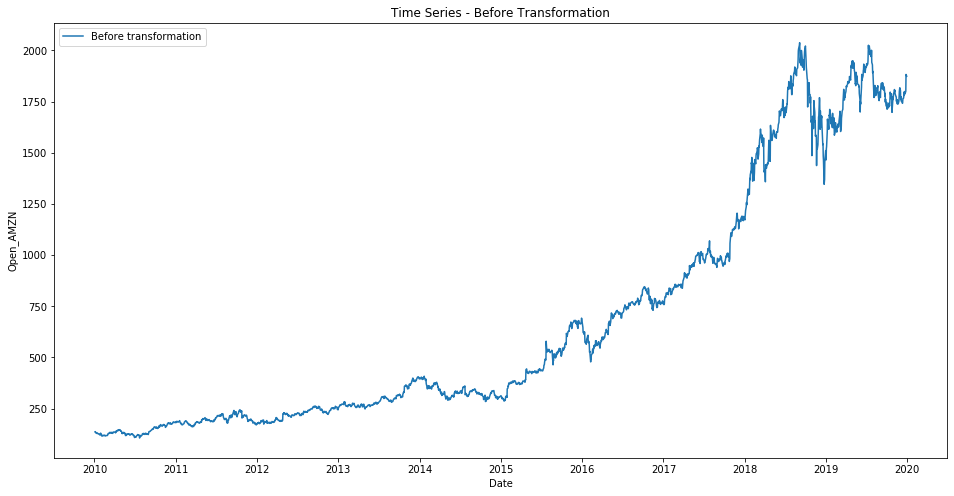

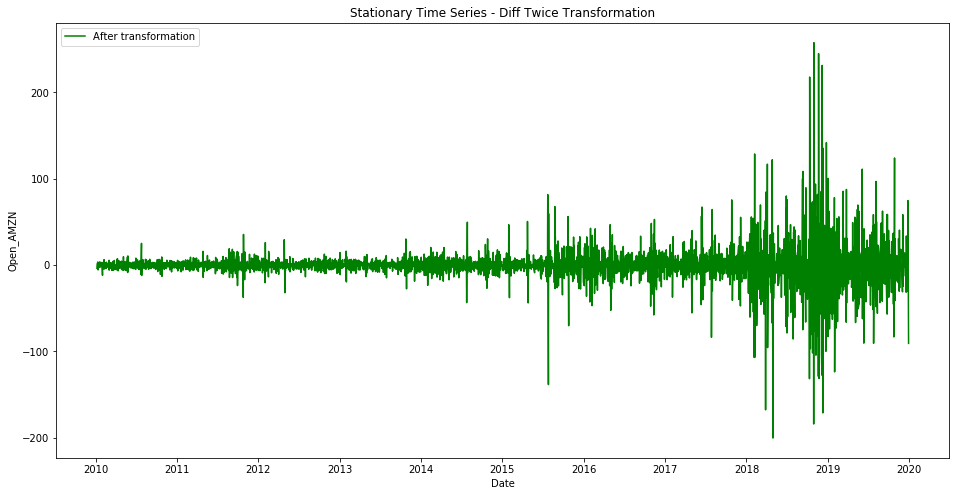

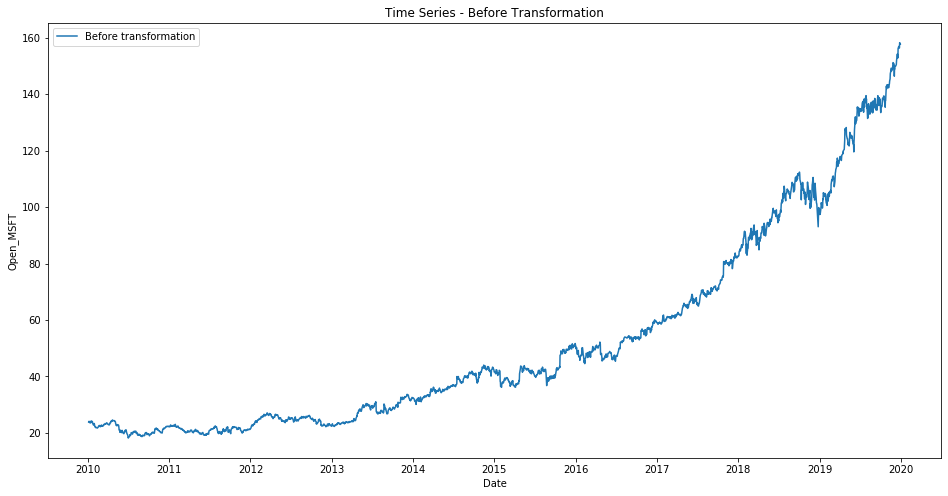

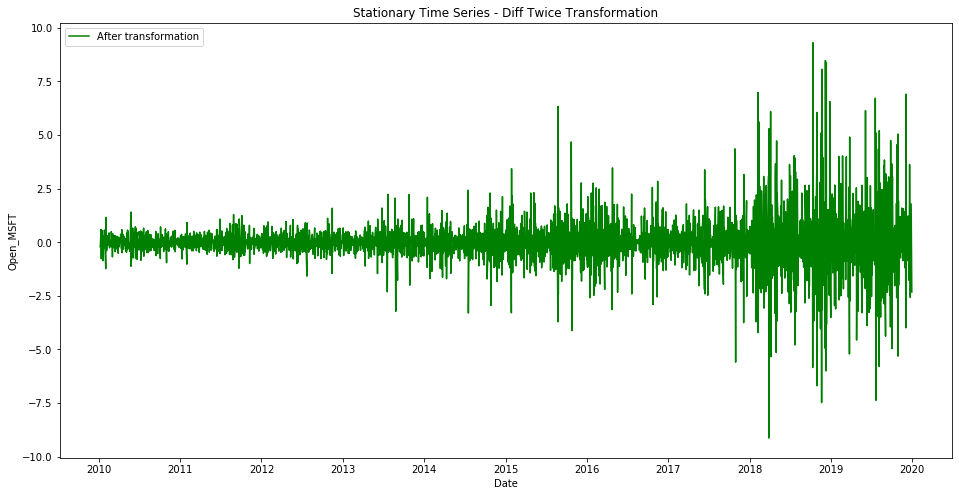

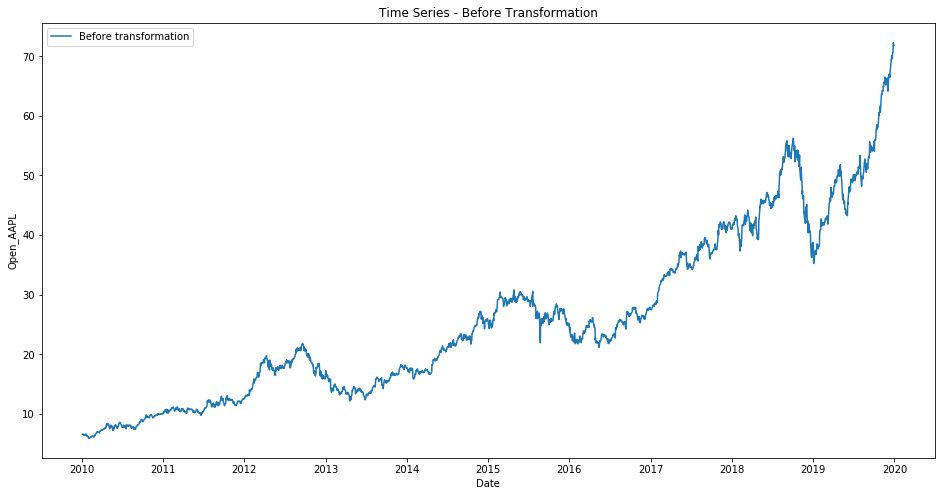

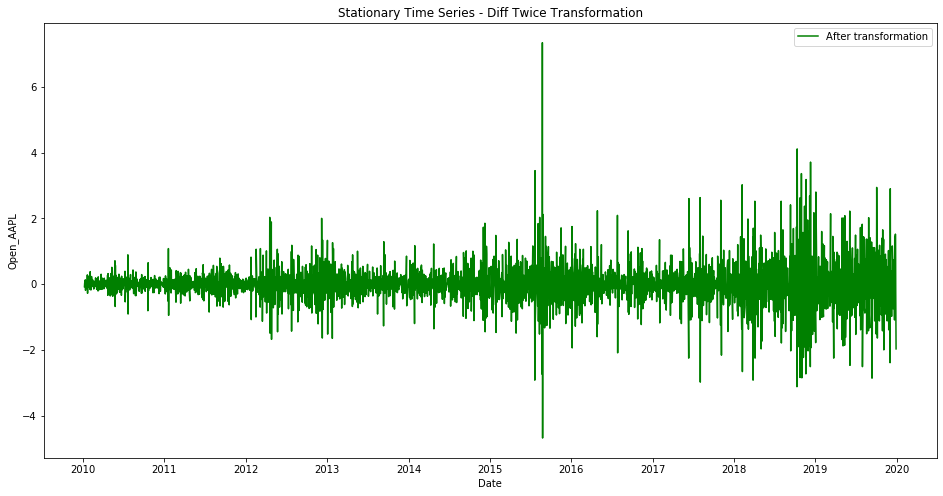

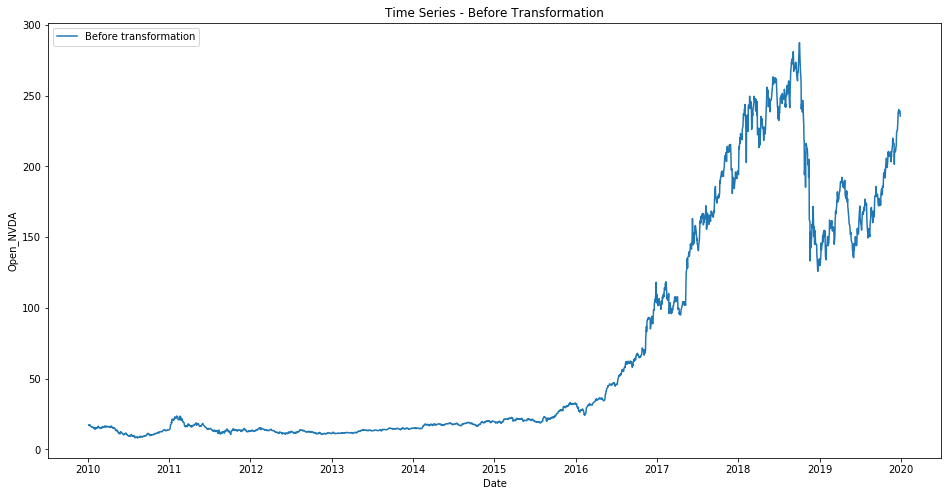

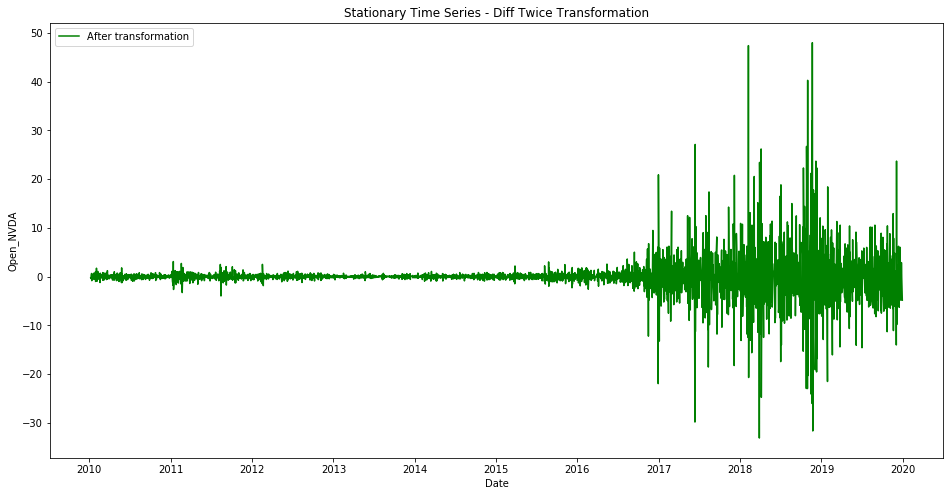

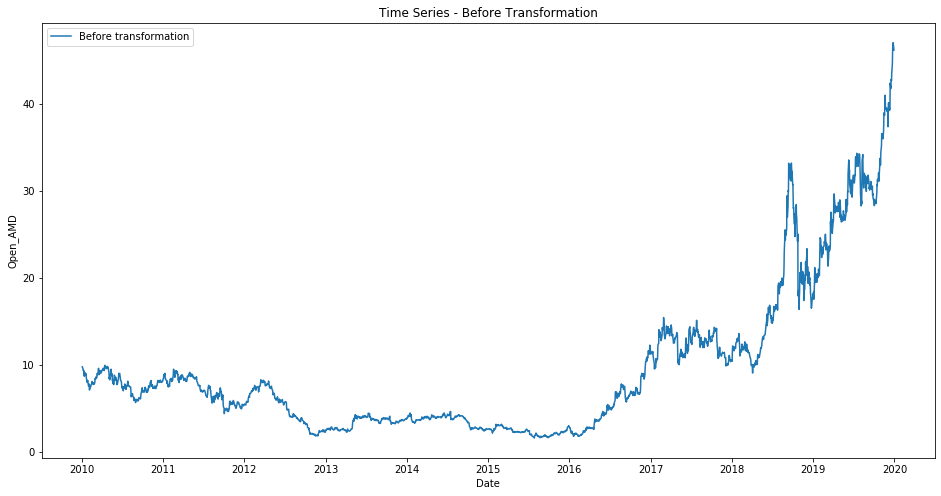

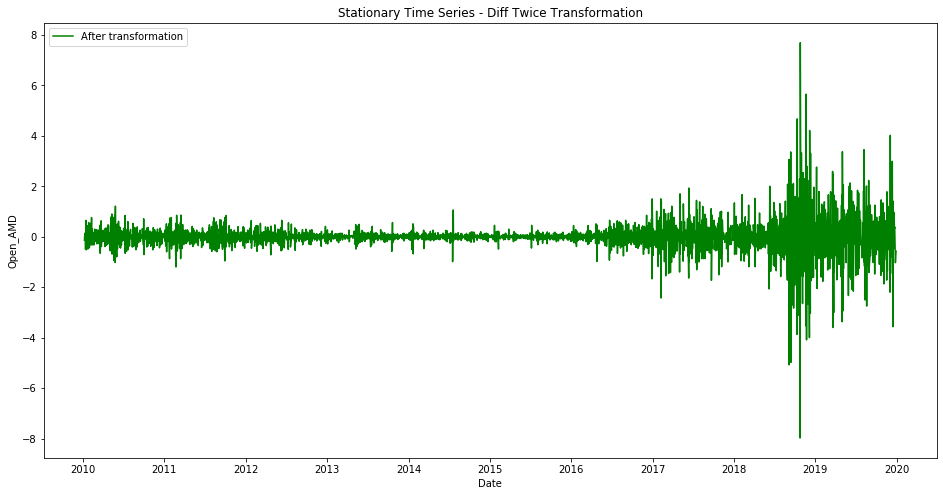

In [8]:
# Plot the time series before transformation
plt.figure(figsize=(16,8))
sns.lineplot(x=data.index, y='Open_AMZN', data=data, linewidth=1.5, label='Before transformation').set_title('Time Series - Before Transformation')
plt.show()

# Plot the time series after transformation
plt.figure(figsize=(16,8))
sns.lineplot(x=data_diffdiff.index, y='Open_AMZN', data=data_diffdiff, label='After transformation', color='green').set_title('Stationary Time Series - Diff Twice Transformation')
plt.show()

plt.figure(figsize=(16,8))
sns.lineplot(x=data.index, y='Open_MSFT', data=data, linewidth=1.5, label='Before transformation').set_title('Time Series - Before Transformation')
plt.show()


plt.figure(figsize=(16,8))
sns.lineplot(x=data_diffdiff.index, y='Open_MSFT', data=data_diffdiff, label='After transformation', color='green').set_title('Stationary Time Series - Diff Twice Transformation')
plt.show()

plt.figure(figsize=(16,8))
sns.lineplot(x=data.index, y='Open_AAPL', data=data, linewidth=1.5, label='Before transformation').set_title('Time Series - Before Transformation')
plt.show()


plt.figure(figsize=(16,8))
sns.lineplot(x=data_diffdiff.index, y='Open_AAPL', data=data_diffdiff, label='After transformation', color='green').set_title('Stationary Time Series - Diff Twice Transformation')
plt.show()

plt.figure(figsize=(16,8))
sns.lineplot(x=data.index, y='Open_NVDA', data=data, linewidth=1.5, label='Before transformation').set_title('Time Series - Before Transformation')
plt.show()


plt.figure(figsize=(16,8))
sns.lineplot(x=data_diffdiff.index, y='Open_NVDA', data=data_diffdiff, label='After transformation', color='green').set_title('Stationary Time Series - Diff Twice Transformation')
plt.show()

plt.figure(figsize=(16,8))
sns.lineplot(x=data.index, y='Open_AMD', data=data, linewidth=1.5, label='Before transformation').set_title('Time Series - Before Transformation')
plt.show()


plt.figure(figsize=(16,8))
sns.lineplot(x=data_diffdiff.index, y='Open_AMD', data=data_diffdiff, label='After transformation', color='green').set_title('Stationary Time Series - Diff Twice Transformation')
plt.show()

In [9]:
X = data_diffdiff.drop(['Return_AMZN','Return_AAPL','Return_MSFT','Return_NVDA','Return_AMD'],axis=1)
y = data_diffdiff[['Return_AMZN','Return_AAPL','Return_MSFT','Return_NVDA','Return_AMD']]
X.columns

Index(['Unnamed: 0', 'Volume_AMZN', 'Close_AMZN', 'Open_AMZN', 'Volume_AAPL',
       'Close_AAPL', 'Open_AAPL', 'Volume_MSFT', 'Close_MSFT', 'Open_MSFT',
       'Volume_NVDA', 'Close_NVDA', 'Open_NVDA', 'Volume_AMD', 'Close_AMD',
       'Open_AMD'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [11]:
scaler = StandardScaler() 
X_trained = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
